In [10]:
from yunchieh_plotlib.SHAP_plot import plot_shap

In [8]:
#function example
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values_test = explainer(X_test)
print(f"Shape of SHAP value:{shap_values_test.values.shape}")  

Shape of SHAP value:(45, 4, 3)


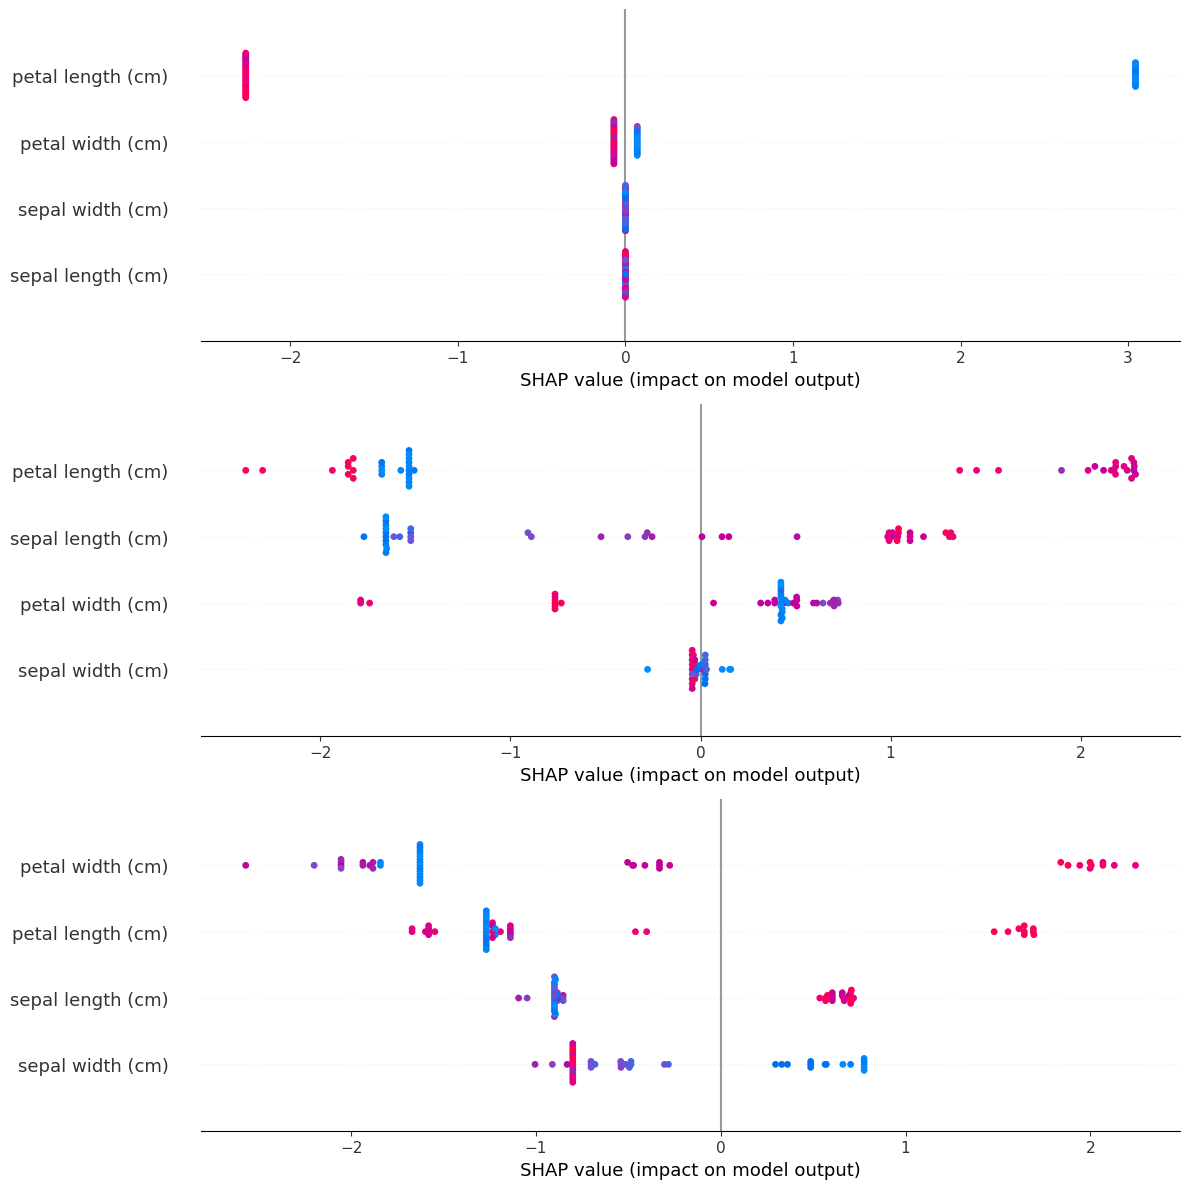

In [9]:

fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3, 1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

ax = [ax1, ax2, ax3]

## Plot SHAP results (generic version) ##

for k in range(shap_values_test.values.shape[2]):
    
    plot_shap(shap_values=shap_values_test[...,k], ax=ax[k], color_bar=False)

plt.tight_layout()
plt.show()